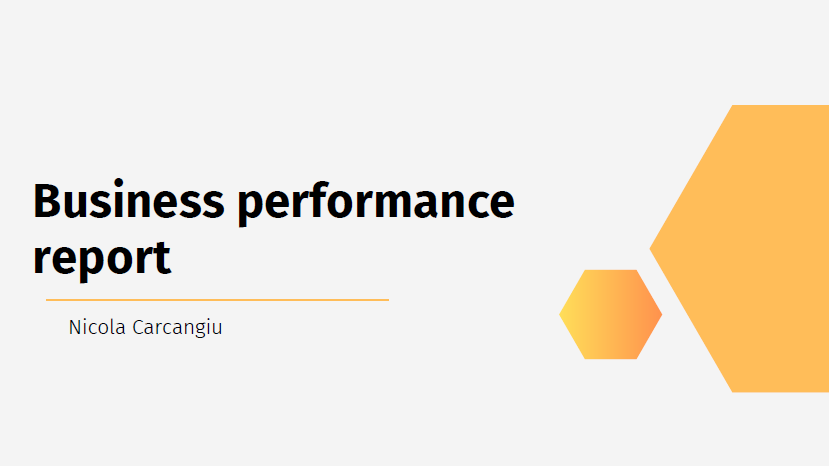

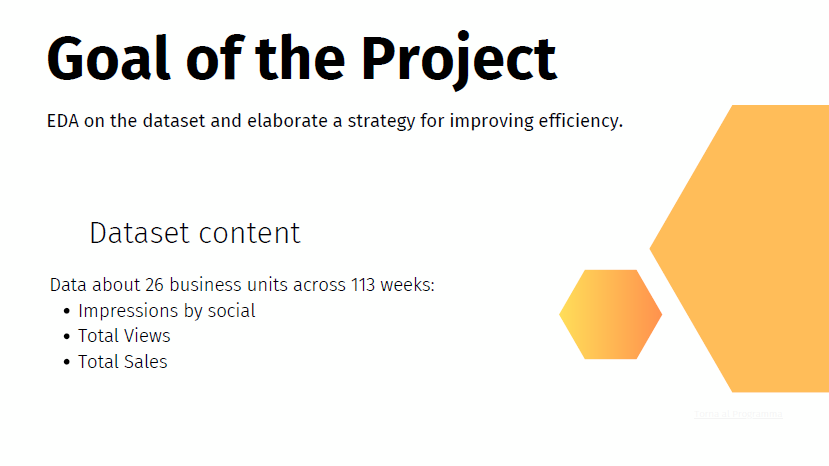

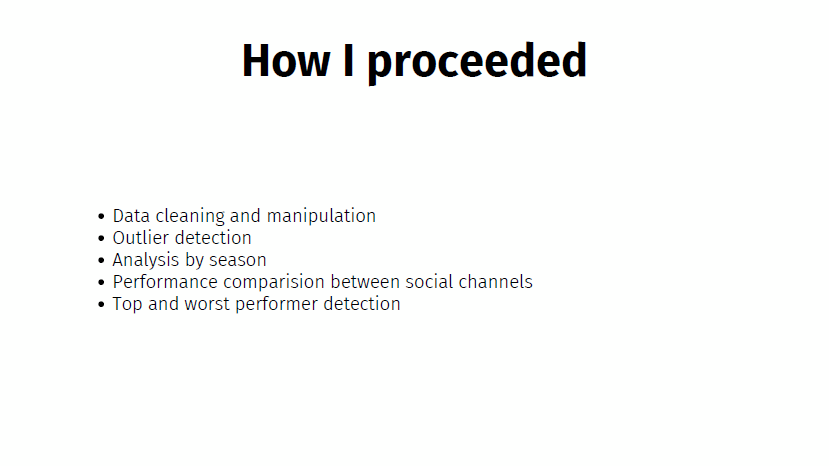

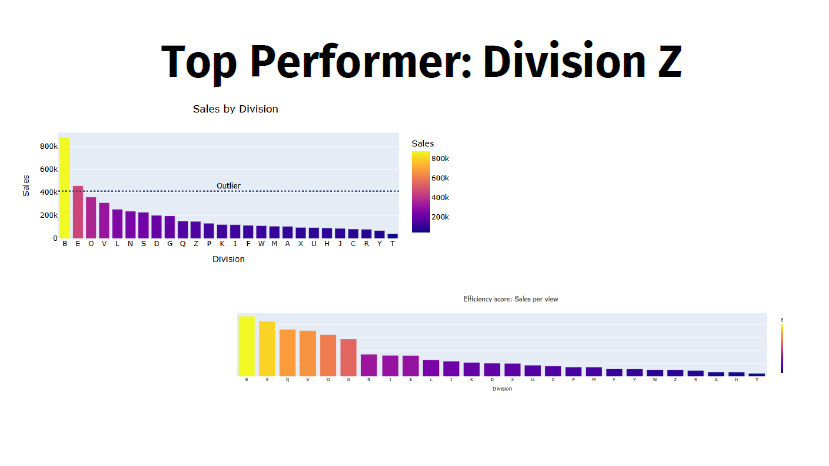

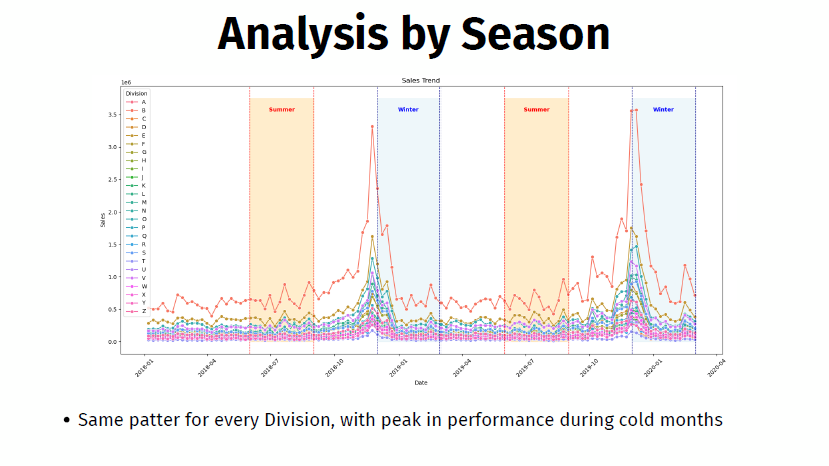

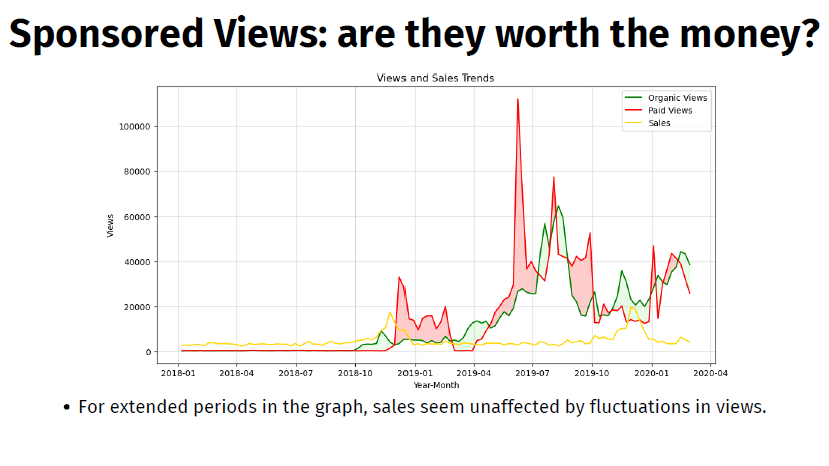

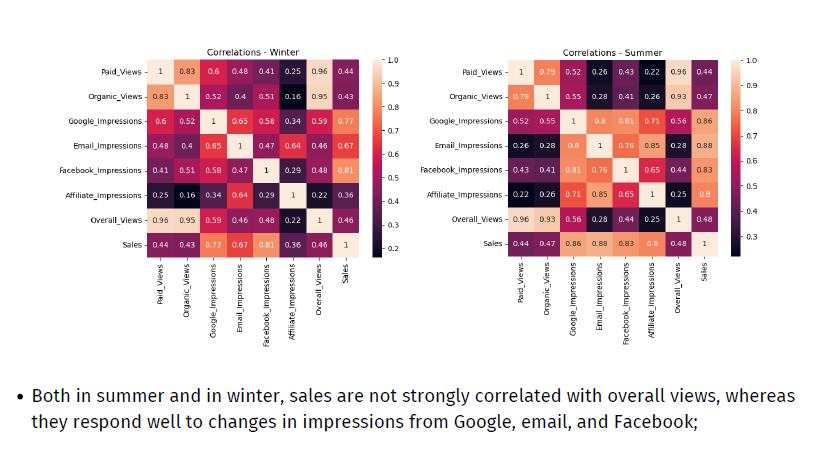

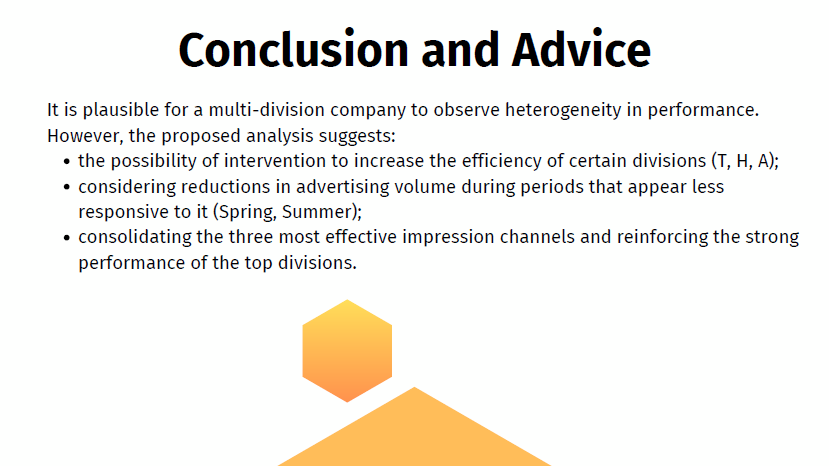

## EDA: Exploratory Data Analysis

The following dataset contains data regarding views, impressions and sales of a company operating in a product category of unknown nature. The data is structured as follows: there are 26 business divisions (one for each letter of the alphabet), each reporting weekly data spanning from January 2018 to early 2020.

The goal of this Exploratory Data Analysis (EDA) is to investigate the variations of specific columns over time, searching for seasonal patterns, correlations between variables, and performance heterogeneity or homogeneity across the various divisions recorded in the dataframe.

After a preliminary data cleaning step, I will provide detailed commentary on each operation using markdown cells, in order to ensure a clear and readable structure.

Link dataset (Kaggle): https://www.kaggle.com/datasets/yugagrawal95/sample-media-spends-data

In [1]:
import plotly.io as pio

In [2]:
#import 

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv("Sample Media Spend Data.csv")
df.head()

Division Calendar_Week  Paid_Views  Organic_Views  Google_Impressions  \
0        A      1/6/2018         392            422                 408   
1        A     1/13/2018         787            904                 110   
2        A     1/20/2018          81            970                 742   
3        A     1/27/2018          25            575                  65   
4        A      2/3/2018         565            284                 295   

   Email_Impressions  Facebook_Impressions  Affiliate_Impressions  \
0        349895.0107                 73580                  12072   
1        506270.2176                 11804                   9499   
2        430042.1538                 52232                  17048   
3        417745.6658                 78640                  10207   
4        408505.8012                 40561                   5834   

   Overall_Views  Sales  
0            682  59417  
1            853  56806  
2            759  48715  
3            942  72047  
4            658  56235

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3051 entries, 0 to 3050
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Division               3051 non-null   object 
 1   Calendar_Week          3051 non-null   object 
 2   Paid_Views             3051 non-null   int64  
 3   Organic_Views          3051 non-null   int64  
 4   Google_Impressions     3051 non-null   int64  
 5   Email_Impressions      3051 non-null   float64
 6   Facebook_Impressions   3051 non-null   int64  
 7   Affiliate_Impressions  3051 non-null   int64  
 8   Overall_Views          3051 non-null   int64  
 9   Sales                  3051 non-null   int64  
dtypes: float64(1), int64(7), object(2)
memory usage: 238.5+ KB


### Data Cleaning and Feature Transformation

In [4]:
df[df.duplicated()]

Empty DataFrame
Columns: [Division, Calendar_Week, Paid_Views, Organic_Views, Google_Impressions, Email_Impressions, Facebook_Impressions, Affiliate_Impressions, Overall_Views, Sales]
Index: []

There are no duplicate values

In [5]:
df.isna().sum()

Division                 0
Calendar_Week            0
Paid_Views               0
Organic_Views            0
Google_Impressions       0
Email_Impressions        0
Facebook_Impressions     0
Affiliate_Impressions    0
Overall_Views            0
Sales                    0
dtype: int64

There are no missing values, features' names are OK. I am changing data format:

In [6]:
# datatype change for 'Calendar_Week'

df['Calendar_Week'] = pd.to_datetime(df['Calendar_Week'], format='%m/%d/%Y')

df["Calendar_Week"]  

0      2018-01-06
1      2018-01-13
2      2018-01-20
3      2018-01-27
4      2018-02-03
          ...    
3046   2020-02-01
3047   2020-02-08
3048   2020-02-15
3049   2020-02-22
3050   2020-02-29
Name: Calendar_Week, Length: 3051, dtype: datetime64[ns]

The data is collected on a weekly basis, meaning all entries refer to the same day of the week (Saturday). In the cell below, I use _.dt.dayofweek_, which returns 5 confirming that the reference day is Saturday (the count starts at 0).

This information grants a more robust analysis since impressions and customers' habits vary along the days of the week.

In [7]:
df["Calendar_Week"].dt.dayofweek.head(3)

0    5
1    5
2    5
Name: Calendar_Week, dtype: int32

In [8]:
df.Division.nunique()

26

In [9]:
divisioni = df.Division.unique()
divisioni

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
       'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'],
      dtype=object)

There is a business unit for each one of the 26 letter of the alphabet; each Division has 113 recorded data regarding the same timespan (2018-2020 approx.)

In [10]:
for lett in divisioni: 
    if ((df.Division==lett).sum()) != 113:
        print(f"Division {lett} has not 113 records")

Division Z has not 113 records


In [11]:
(df.Division=='Z').sum()

226

In [12]:
df.query("Division == 'Z' and Calendar_Week == '2018-01-06'")

Division Calendar_Week  Paid_Views  Organic_Views  Google_Impressions  \
2825        Z    2018-01-06         165            346                 440   
2938        Z    2018-01-06         887            376                 940   

      Email_Impressions  Facebook_Impressions  Affiliate_Impressions  \
2825        939300.8528                156226                  43811   
2938        512646.3434                 89989                  26445   

      Overall_Views   Sales  
2825            223  113911  
2938            317   60627

Division Z has twice as many rows as the others. However, from row 113 to 126, the only identical value across those rows is the WeekCalendar; all the other values are different.


There are no additional informations available on the dataset's description page, so I select only Division Z from the dataframe and then I perform a groupby operation to "pair" the rows that share the same date and compute the mean of the corresponding values.

In [13]:
df_z = df.query("Division == 'Z'")
df_z1=df_z.groupby("Calendar_Week", as_index=False).agg({"Paid_Views":'mean',"Organic_Views":'mean',
                                                   "Google_Impressions":'mean',
                                                   "Email_Impressions":'mean',"Facebook_Impressions":'mean',
                               "Affiliate_Impressions":'mean',"Overall_Views":'mean',"Sales":'mean'})

df_z1["Division"] = 'Z'

I remove Division Z records from the original dataset and replace them with new ones.

In [14]:
df_z1

Calendar_Week  Paid_Views  Organic_Views  Google_Impressions  \
0      2018-01-06       526.0          361.0               690.0   
1      2018-01-13       193.5          433.5               229.0   
2      2018-01-20       878.0          496.5               513.5   
3      2018-01-27       321.0          423.5               422.0   
4      2018-02-03       530.0          684.5               291.0   
..            ...         ...            ...                 ...   
108    2020-02-01     40859.5        38816.0            904111.5   
109    2020-02-08     37301.0        41277.5            941720.0   
110    2020-02-15     35234.5        46791.0            656436.5   
111    2020-02-22     28721.0        44530.0            678104.0   
112    2020-02-29     22862.5        39701.0            640470.0   

     Email_Impressions  Facebook_Impressions  Affiliate_Impressions  \
0         7.259736e+05              123107.5                35128.0   
1         1.049468e+06               19798.5                31213.5   
2         8.906127e+05               67991.5                46568.5   
3         8.664212e+05              112550.0                29365.0   
4         8.467239e+05               64150.0                22450.5   
..                 ...                   ...                    ...   
108       2.067245e+06               58318.0                16121.5   
109       7.568157e+05              284246.5                14151.5   
110       5.986443e+05              505421.0                15359.5   
111       8.624079e+05              518440.0                18366.0   
112       6.213903e+05              234894.5                15871.0   

     Overall_Views     Sales Division  
0            270.0   87269.0        Z  
1            454.5   93213.0        Z  
2            315.5   88845.0        Z  
3            495.5  103117.5        Z  
4            533.0   98888.5        Z  
..             ...       ...      ...  
108        78877.5  113750.5        Z  
109        77842.5  113226.5        Z  
110        81595.0  198287.0        Z  
111        71798.5  157312.5        Z  
112        62302.5  140246.0        Z  

[113 rows x 10 columns]

In [15]:
df_2 = df.query("Division != 'Z'")
df_3 =pd.concat([df_2, df_z1], axis=0).reset_index(drop=True)
df = df_3

Are there holydays on the dataset?

In [16]:
# ad hoc library for detecting holydays for US calendar
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

cal = calendar()
holiday = cal.holidays(start=df["Calendar_Week"].min(), end=df["Calendar_Week"].max())

df.loc[df['Calendar_Week'].isin(holiday)]

Empty DataFrame
Columns: [Division, Calendar_Week, Paid_Views, Organic_Views, Google_Impressions, Email_Impressions, Facebook_Impressions, Affiliate_Impressions, Overall_Views, Sales]
Index: []

There are no holidays in the dataset, so it's not necessary to add a boolean column indicating whether a given date corresponds to a holiday.

In [17]:
quant_cols = ['Paid_Views', 'Organic_Views', 'Google_Impressions',
              'Email_Impressions', 'Facebook_Impressions', 'Affiliate_Impressions', 'Overall_Views', 'Sales']

###  Data Exploration

In [19]:
stats = []

for col in quant_cols:
    mean = np.round(df[col].mean())
    std = np.round(df[col].std())
    cv = (std/mean)
    median = np.round(df[col].median())
    stats.append({"feature":col,
                  'Median':median,
                 'Mean': mean,
                 'Std. Deviation':std,
                 'Coefficient of Variation':cv})

stats_df = pd.DataFrame(stats)
pd.pivot_table(stats_df, index=stats_df["feature"])
# a very similar result would be with .describe(), but I prefer this format of displaying data

Coefficient of Variation      Mean    Median  \
feature                                                               
Affiliate_Impressions                  0.952437   23001.0   16330.0   
Email_Impressions                      0.833564  758719.0  590964.0   
Facebook_Impressions                   1.741468  269537.0  127166.0   
Google_Impressions                     1.540405  886172.0  487732.0   
Organic_Views                          1.819532   13332.0    4091.0   
Overall_Views                          1.875464   28008.0    7708.0   
Paid_Views                             2.052291   15146.0    2664.0   
Sales                                  1.256322  187296.0  112728.0   

                       Std. Deviation  
feature                                
Affiliate_Impressions         21907.0  
Email_Impressions            632441.0  
Facebook_Impressions         469390.0  
Google_Impressions          1365064.0  
Organic_Views                 24258.0  
Overall_Views                 52528.0  
Paid_Views                    31084.0  
Sales                        235304.0

All quantitative variables have highly spread values, as also seen with boxplots:

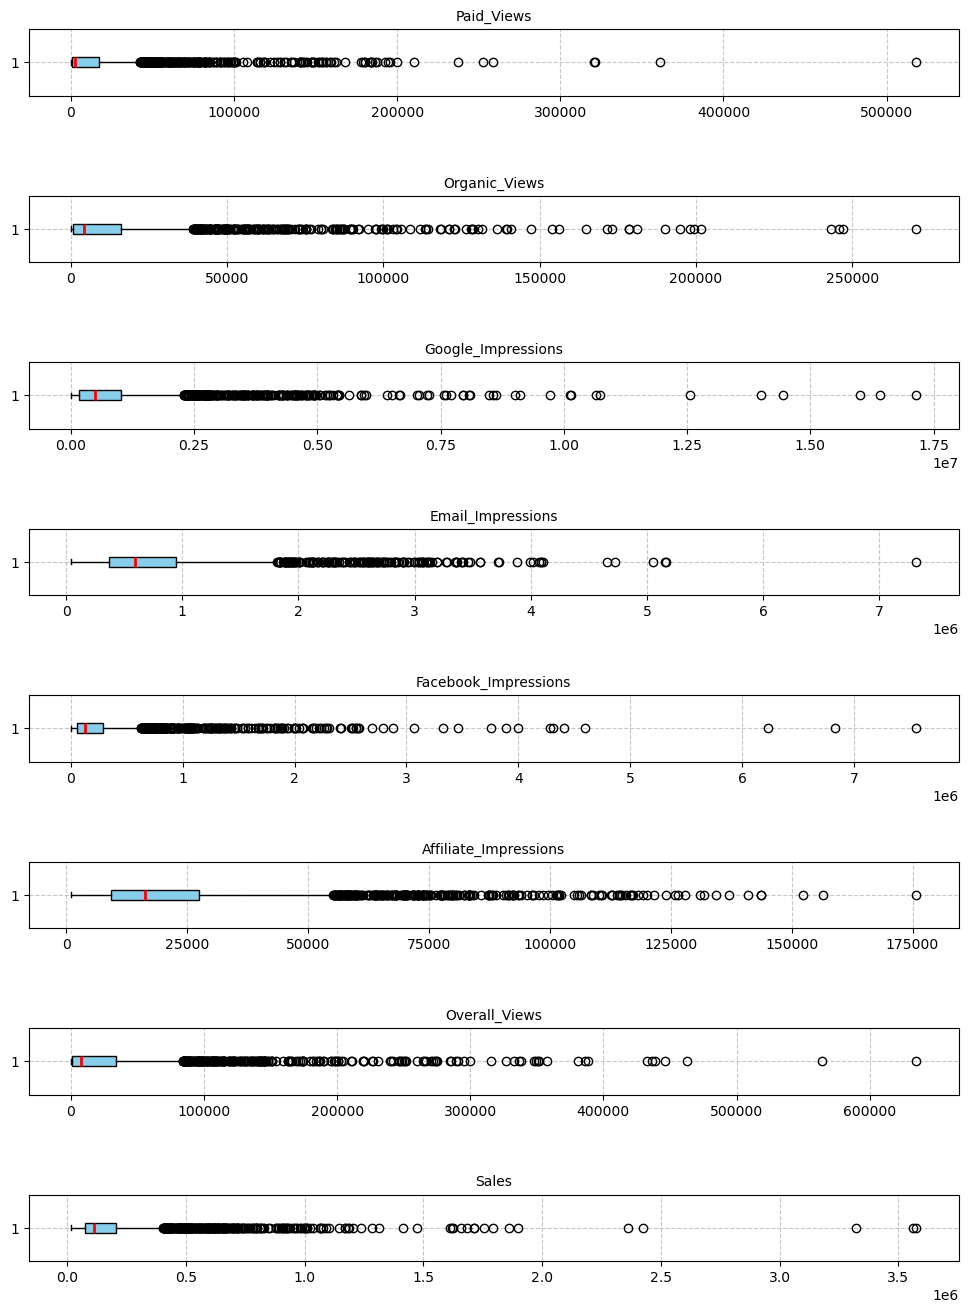

In [20]:
nrows = len(df[quant_cols].columns)
fig, axes = plt.subplots(nrows=nrows, ncols=1, figsize=(12,16))
fig.subplots_adjust(hspace=1.5)
for ax, col in zip(axes, df[quant_cols]):
    ax.boxplot(df[col], vert=False, patch_artist=True,
              boxprops={'color':'black', 'facecolor':'skyblue'},
              medianprops={'lw':2,'color':'red'})
    ax.set_title(col, fontsize=10, fontweight="ultralight")
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.set_xscale('linear')

plt.show()

When distributions are so dispersed and strongly skewed (positively, in this case), it is advisable to rely on the median (shown as a red line in each boxplot above) as a more robust measure of central tendency.
The median is less sensitive to extreme values compared to the mean, which tends to be pulled toward the tail where high values (and potential outliers) lie.

The boxplots show that each column (with each value associated with a different date) exhibits high variability, indicating that these metrics have been far from constant over time.
This is not necessarily a bad sign and as will be shown later the overall trend is upward.
Such fluctuations are consistent with the idea of a rapidly growing company, likely founded in or shortly before 2018.

## Analysis by Season

New feature reporting Season

In [21]:
# una funzione per associare ciascun mese alla stagione più opportuna

def stagioni_conv(numero):
    if numero in [12, 1, 2]:
        return "Winter"
    elif numero in [3, 4, 5]:
        return "Spring"
    elif numero in [6, 7, 8]:
        return "Summer"
    elif numero in [9, 10, 11]:
        return "Fall"

In [22]:
df["Season"] = df["Calendar_Week"].dt.month.apply(stagioni_conv)

In [23]:
seasons_df = df.groupby("Season")["Sales"].agg(['mean', 'median', 'sum']).sort_values(by="sum").rename(columns={
        'mean': 'Mean Sales',
        'median': 'Median Sales',
        'sum': 'Total Sales'
    })
seasons_df

Mean Sales  Median Sales  Total Sales
Season                                          
Spring  130929.948225      89354.50   88508645.0
Summer  136249.248575      88914.00   95646972.5
Fall    269294.647929     164362.50  182043182.0
Winter  208232.808824     124712.25  184077803.0

Regarding to sales, Winter and Fall outperform Spring and Summer. About the views:

In [24]:
seasons_df_views = df.groupby("Season")["Overall_Views"].agg(['mean', 'median', 'sum']).sort_values(by="sum").rename(columns={
        'mean': 'Mean Views',
        'median': 'Median Views',
        'sum': 'Total Views'
    })
seasons_df_views 

Mean Views  Median Views  Total Views
Season                                         
Spring  10391.428254         990.5    7024605.5
Fall    24759.982988        8866.0   16737748.5
Winter  30213.776018       15220.0   26708978.0
Summer  45320.918803        6943.5   31815285.0

Now, the situation is reversed: summer far exceeds the other three seasons in terms of volume, becoming the least efficient season among the four.

In [25]:
df["Season"].value_counts()

Season
Winter    884
Summer    702
Spring    676
Fall      676
Name: count, dtype: int64

There are more winter days in the dataframe than days from any other season. This is because the dataset includes dates up until the early weeks of 2020, which fall in winter.
To mitigate this effect, I calculate the total sales for each season and then divide it by the number of days in that season.

In [28]:
stagioni = df["Season"].unique()
    
for i,stagione in enumerate(stagioni):
    print(f'Stagione: {stagione}', np.round(df.loc[df["Season"] == stagioni[i]]["Sales"].sum() / df.loc[df["Season"] == stagioni[i]].shape[0]))  

Stagione: Winter 208233.0
Stagione: Spring 130930.0
Stagione: Summer 136249.0
Stagione: Fall 269295.0


La media giornaliera nelle stagioni fredde è desisamente più alta rispetto alle controparti più calde. Con i grafici di sotto vedremo come le vendite nelle diverse stagioni si attestano su diversi ordini di grandezza:

In [30]:
stagioni = df["Season"].unique()

fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(8,8), sharey=True, sharex=True)

for i, stagione in enumerate(stagioni):
    ax[i].hist(df['Sales'].loc[df["Season"] == stagione], bins=18)
    ax[i].set_title(stagione)
    ax[i].set_xscale('linear')
    
fig.tight_layout()
plt.show()

In [32]:
import plotly.express as px

#creo un grafico più interattivo per ottenere maggiori informazioni riguardo ciascuna delle stagioni

fig = px.box(df, x="Season", y="Sales",
            width=1800, height=500, color='Season')

fig.update_layout(
    title = "Variability across daily sales",
    title_font={'size':18},
    title_x = 0.5,
    legend=dict(
        x=0.9, 
        y=1.01,  
        title_text="Season",
        bgcolor='rgba(0,0,0,0)'
    )
)
fig.show()

Both charts show that colder seasons are associated with higher volumes.
The shape of the distribution across the different seasons is almost identical: strongly right-skewed, meaning there is a positive skew.

Days in the winter and autumn months tend to be more profitable than those in the other two seasons.

In [33]:
import plotly.express as px

fig = px.box(df, x="Season", y="Overall_Views",
            width=1800, height=500, color='Season')

fig.update_layout(
    title = "Variability across daily Views",
    title_font={'size':18},
    title_x = 0.5,
    legend=dict(
        x=0.9, 
        y=1.01,  
        title_text="Season",
        bgcolor='rgba(0,0,0,0)'
    )
)
fig.show()

Summer appears to have significantly higher numbers in 'Overall Views', yet it is less efficient in terms of sales.
Let’s analyze which parameters are better correlated with each other and, more specifically, with sales:

In [34]:
matr = df.loc[:,"Paid_Views":"Sales"].corr()

sns.heatmap(matr, annot=True)

<Axes: >

Sales are strongly correlated with impressions on Google, Facebook, and Email.
Organic views seem to perform better than those generated through advertising.

In [35]:
matr_inverno = df.loc[df["Season"] == 'Winter', "Paid_Views":"Sales"].corr()
sns.heatmap(matr_inverno, annot=True)
plt.title("Correlations - Winter");

In [36]:
matr_estate = df.loc[df["Season"] == 'Summer', "Paid_Views":"Sales"].corr()
sns.heatmap(matr_estate, annot=True)
plt.title("Correlations - Summer");

Google, Facebook, and Email appear to be the cornerstones of the conversion from impressions to sales, with a correlation >= 0.8 .

Affiliate Impressions show a correlation with sales that is highly sensitive to the season: during summer, it joins the top three while in winter the correlation drops to 0.44. 

Let's take a closer look at the trends of these three features compared to sales:

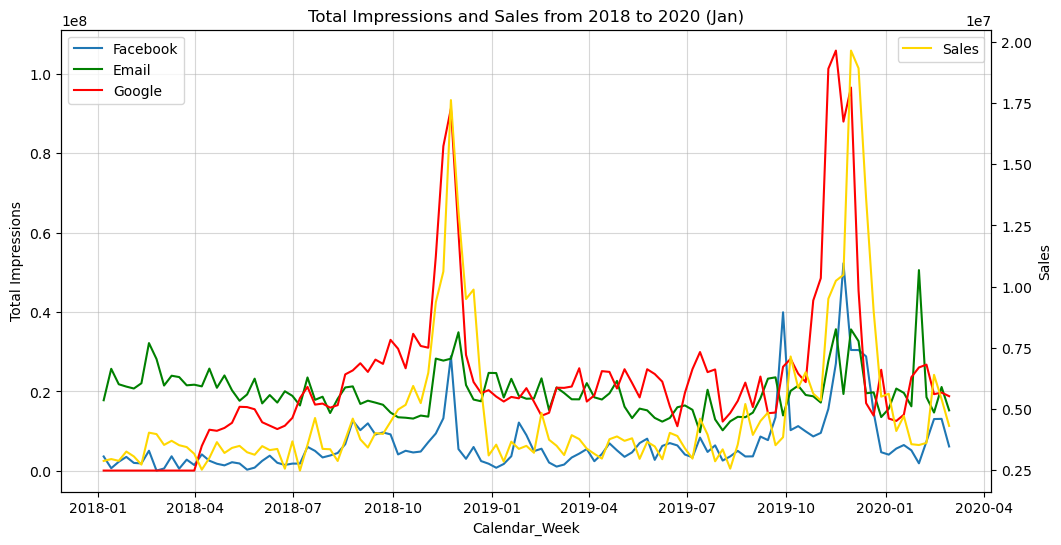

In [37]:
plt.figure(figsize=(12, 6))

ax1 = sns.lineplot(data=df, y="Facebook_Impressions", x="Calendar_Week", estimator='sum', errorbar=None, label='Facebook')
sns.lineplot(data=df, y="Email_Impressions", x="Calendar_Week", estimator='sum', errorbar=None, label='Email', color='green', ax=ax1)
sns.lineplot(data=df, y="Google_Impressions", x="Calendar_Week", estimator='sum', errorbar=None, label='Google', color='r', ax=ax1)
ax1.set_ylabel("Total Impressions")
ax1.grid(alpha=0.5)

ax2 = ax1.twinx()
sns.lineplot(data=df, y="Sales", x="Calendar_Week", estimator='sum', errorbar=None, label='Sales', color='gold', ax=ax2)
ax2.set_ylabel("Sales")

plt.title("Total Impressions and Sales from 2018 to 2020 (Jan)")
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

plt.show()

Sales' trend aligns with impressions' one: that is not surprising, considering the high correlation found before. 

Let's turn our attention to paid and organic views:

In [38]:
print("Paid Impressions sum:", df["Paid_Views"].sum())
print("Organic Impressions sum:", df["Organic_Views"].sum())

Paid Impressions sum: 44497754.0
Organic Impressions sum: 39169428.0


The values are not too far apart from each other.

Are the views stable over time?

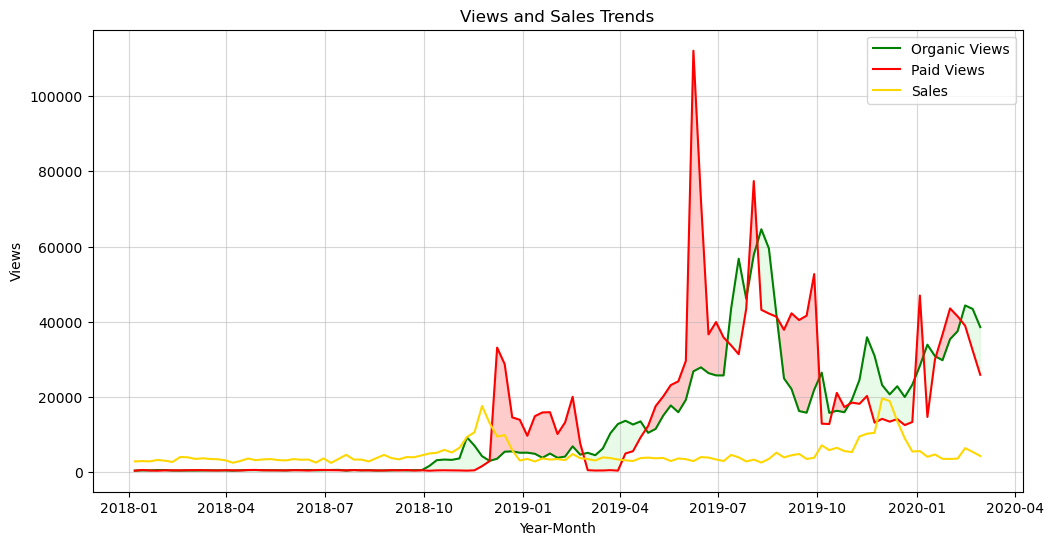

In [39]:
views_df = df.groupby("Calendar_Week")[["Paid_Views","Organic_Views"]].mean().reset_index()

fig, ax = plt.subplots(figsize=(12, 6))

sns.lineplot(data=views_df, x='Calendar_Week', y='Organic_Views', label='Organic Views', errorbar=None, color='green')
sns.lineplot(data=views_df, x='Calendar_Week', y='Paid_Views', label='Paid Views', errorbar=None, color='red')
sns.lineplot(data=df, x='Calendar_Week', y=pd.to_numeric(df['Sales'])/1000, estimator='sum', errorbar=None, label='Sales', color='gold')

ax.fill_between(
    views_df["Calendar_Week"], views_df["Organic_Views"], views_df["Paid_Views"],
    where=(views_df["Organic_Views"] < views_df["Paid_Views"]),
    color='red', interpolate=True, alpha=0.2)

ax.fill_between(
    views_df["Calendar_Week"], views_df["Organic_Views"], views_df["Paid_Views"],
    where=(views_df["Organic_Views"] > views_df["Paid_Views"]),
    color='lightgreen', interpolate=True, alpha=0.2)

ax.set_xlabel("Year-Month")
ax.set_ylabel("Views")
ax.set_title("Views and Sales Trends")
plt.grid(alpha=0.5)
plt.show()

The graph shows how organic and paid views generally have values of the same magnitude, with some exceptions where one surpasses the other and vice versa.

There is a long period where both views increase visibly (from the summer of 2019 to autumn of the same year), yet there was no change in Sales during this perio

A consideration must be made regarding the correlation between these two variables and sales: since we don't have additional data, we might be forced to assume that this isn't a spurious correlation or a causal chain, and that the two variables are naturally connected in this way. However, it might be advisable for the company to revisit its marketing strategy regarding paid views.
A correlation value of 0.29 indicates, according to traditional statistical interpretation, a low correlation: therefore, the Sales variable is not highly sensitive to the Paid Views variable. If we were to calculate r2, which tells us the variability of Y ('Sales') relative to X ('Paid_Views'), we would obtain a value of approximately 0.08 (very low).

If we exclude the hypothesis that Paid Views cannot impact sales in the same way as other variables (an unlikely but not impossible hypothesis), we would consider that paid views might need to improve their effectiveness, and the ways to achieve that are limited. The main approach is to reassess the advertising target: almost all advertising platforms allow advertisers to select the audience for their ads. A low correlation like this might be due to low compatibility with the audience reached through paid sponsorships. Therefore, the same campaign could be tested with a different target audience, and we could observe any improvements or declines. 

It is important to remember that paid views have the lowest possible selection bias: the audience to whom a sponsored multimedia content is shown has not deliberately chosen to view it, unlike other types of views (such as a YouTube video or an ad opened from one’s email inbox).

## Analisi per Divisioni: la mosca bianca 'B'

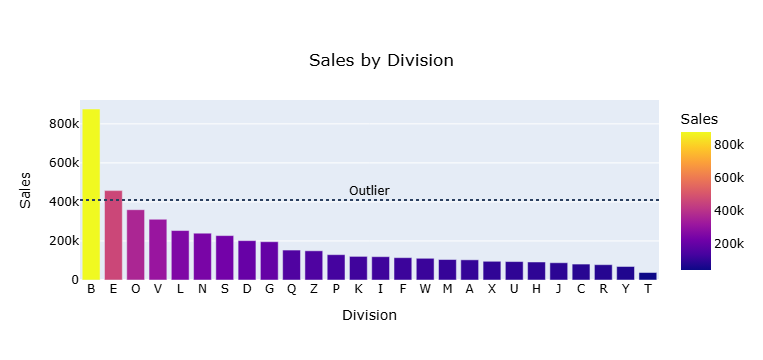

In [40]:
division_sales = df.groupby("Division")["Sales"].mean().sort_values(ascending=False).reset_index()

fig = px.bar(division_sales, x='Division', y='Sales', color='Sales',
      title='Sales by Division')

fig.update_layout(
    font_color="black",
    title_font_color="black",
    legend = dict(
        title_font_color="black",
        title='Sales'),
    title={'xanchor': 'center',
         'yanchor': 'top',
          'y':0.85,
         'x':0.5,},
    yaxis_title='Sales',
    xaxis_title="Division"
)
#calcolo per outlier
low = np.quantile(division_sales["Sales"], 0.25)
up = np.quantile(division_sales["Sales"], 0.75)

iqr = up-low
up_outlier = up + (1.5*iqr)

fig.add_hline(y=up_outlier, annotation_text='Outlier',
             annotation_position="top", line_dash='dot',
             )

We notice that __B__ and __E__ can be considered as positive outliers.

Are there negative outlier? Not really, since interquartile range is such to make outlier's threshold below 0.

The color scale helps us appreciate the uniformity in values across all divisions.

__Advertising Efficiency__: I calculate the efficiency of each division by operating the division of the sales by the total views.

In [43]:
df['Efficiency'] = df["Sales"] / df["Overall_Views"] 
division_efficiency = df.groupby("Division")["Efficiency"].mean().sort_values(ascending=False).reset_index()
fig = px.bar(division_efficiency, x='Division', y='Efficiency',  color='Efficiency', title='Efficiency score: Sales per view')
fig.update_layout(
    font_color="black",
    title_font_color="black",
    legend_title_font_color="black",
    title={'xanchor': 'center',
         'yanchor': 'top',
          'y':0.85,
         'x':0.5,},
    yaxis_title='Efficiency',
    xaxis_title="Division"
)

Most efficient: __B S Q V O G__ ; 
least efficient: __T H A R Z W__ 

The different divisions show a similar trend over time:

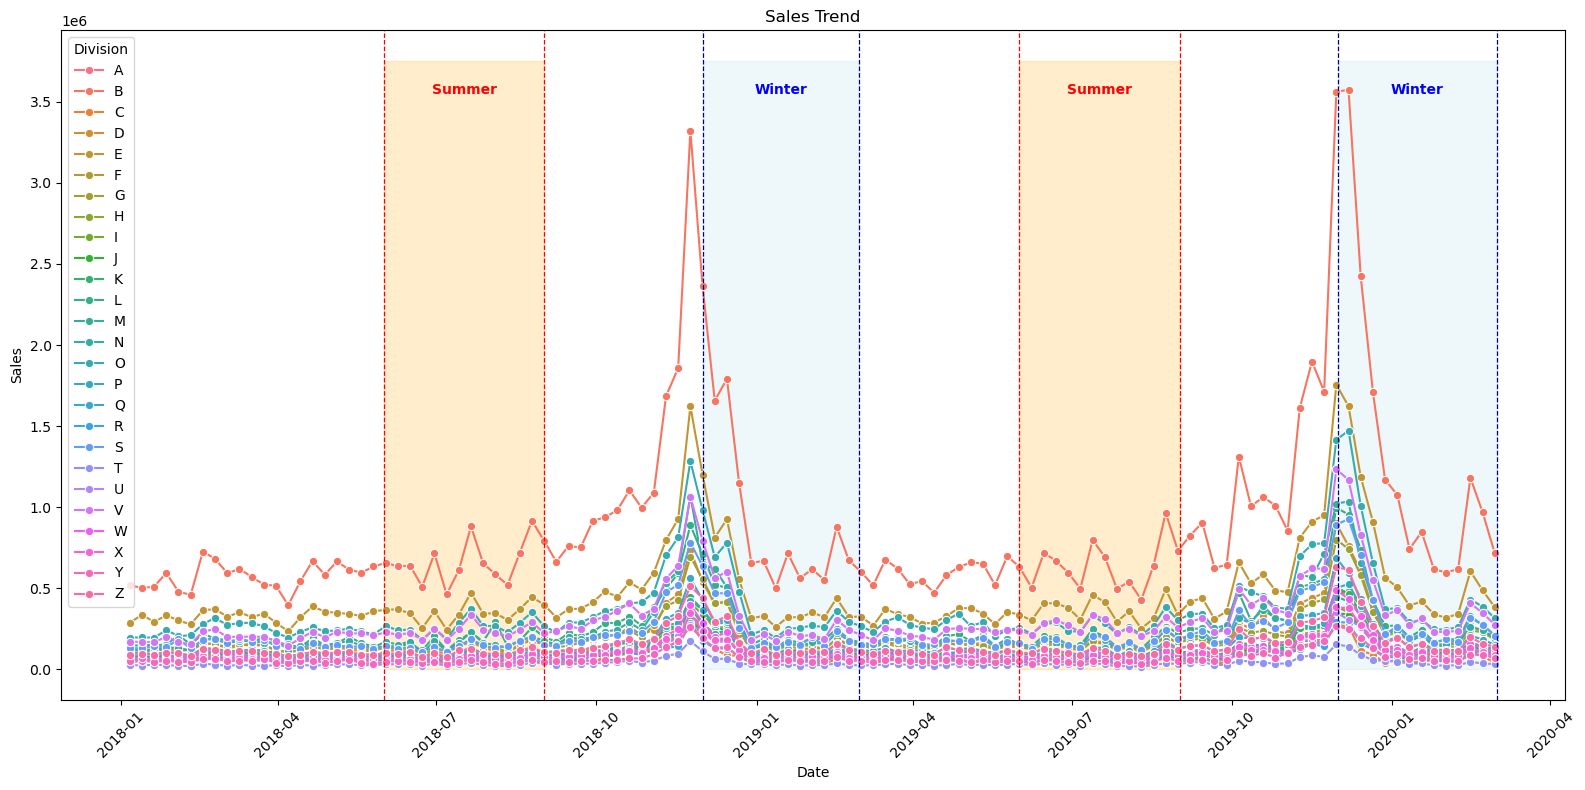

In [44]:
plt.figure(figsize=(16, 8))
sns.lineplot(data=df, x='Calendar_Week', y='Sales', hue='Division', marker='o', estimator='sum')
plt.title("Sales Trend")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend(title='Division')
plt.xticks(rotation=45)
plt.tight_layout()

inizio_inverno = [pd.to_datetime('2018-12-01'), pd.to_datetime('2019-12-01')]
fine_inverno = [pd.to_datetime('2019-03-01'), pd.to_datetime('2020-03-01')]

inizio_estate = [pd.to_datetime('2018-06-01'), pd.to_datetime('2019-06-01')]
fine_estate = [pd.to_datetime('2018-09-01'), pd.to_datetime('2019-09-01')]

ymax = plt.gca().get_ylim()[1]

for inizio, fine in zip(inizio_inverno, fine_inverno):
    plt.axvline(inizio, color='darkblue', linestyle='--', lw=0.9)
    plt.axvline(fine, color='darkblue', linestyle='--', lw=0.9)
    centro = inizio + (fine - inizio) / 2
    plt.text(centro, df["Sales"].max(), 'Winter',
             color='blue', ha='center', va='center', fontsize=10, fontweight='bold', rotation=0)
    plt.fill_betweenx(y=[0, ymax], x1=inizio, x2=fine, 
                      color='lightblue', alpha=0.2)

for inizio, fine in zip(inizio_estate, fine_estate):
    plt.axvline(inizio, color='red', linestyle='--', lw=0.9)
    plt.axvline(fine, color='red', linestyle='--', lw=0.9)
    centro = inizio + (fine - inizio) / 2
    plt.text(centro, df["Sales"].max(), 'Summer',
             color='red', ha='center', va='center', fontsize=10, fontweight='bold', rotation=0)
    plt.fill_betweenx(y=[0, ymax], x1=inizio, x2=fine, 
                      color='orange', alpha=0.2)

plt.show()

This chart aims to show how all divisions follow the same pattern in sales, with a peak around the winter season, regardless of the overall sales volumes recorded over time.

In [45]:
df_sales_cv = (df.groupby("Division")["Sales"].std()/df.groupby("Division")["Sales"].mean()).reset_index()
df_sales_cv["Sales"] = np.round(df_sales_cv["Sales"], 3)

fig, ax = plt.subplots(figsize=(12,6))
ax = sns.barplot(data=df_sales_cv, x='Division', y='Sales')
ax.bar_label(ax.containers[0], fontsize=8);

plt.ylabel("CV")
plt.title("Comparison of the Coefficient of Variation across divisions");

Why do I use the Coefficient of Variation and not the mean or standard deviation?
Given that the data has a large dispersion, I prefer to use this standardized metric to better show how all divisions exhibit data within the same variability scale.

__Rolling Average: Exponential and Simple__

The first of the two is more sensitive to recent changes: since it concerns a relatively short and recent period, it is more appropriate to give greater weight to the sales closer in time to better appreciate the trend of sales.
Both will still be calculated:

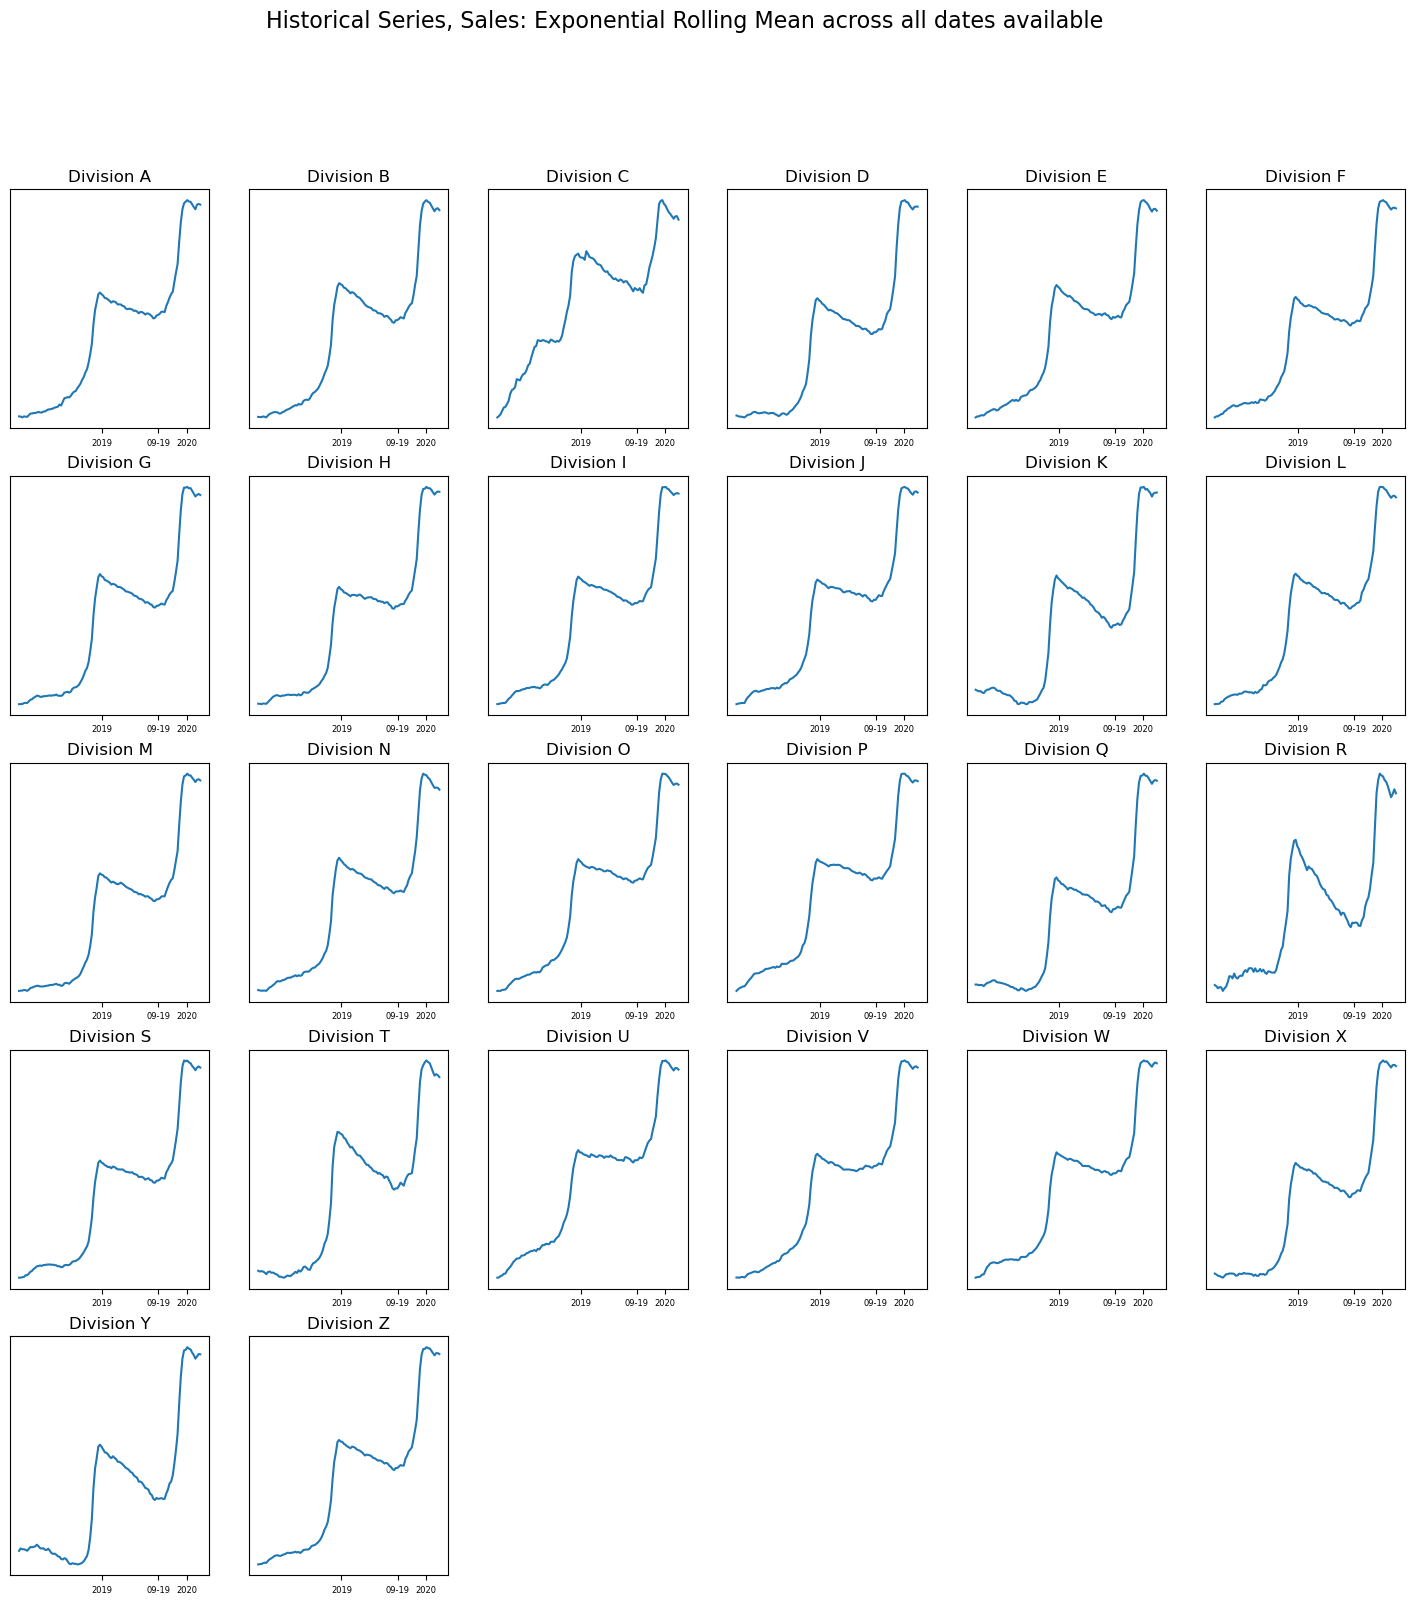

In [46]:
fig, axes = plt.subplots(nrows=5, ncols=6, figsize=(18,18))
fig.suptitle('Historical Series, Sales: Exponential Rolling Mean across all dates available', fontsize=16)

for i, lett in enumerate(df.Division.unique().tolist()):
    riga = i//6
    colonna = i%6
    df_temp = df.loc[df["Division"] == lett]
    # calcolo la media mobile esponenziale, periodo intero
    mean_serie = df_temp["Sales"].transform(lambda x: x.ewm(span=113, adjust=False).mean())
    axes[riga, colonna].plot(df_temp["Calendar_Week"], mean_serie, label=f"Division {lett}")
    axes[riga, colonna].set_title(f"Division {lett}")
    
    axes[riga, colonna].set_xticks([pd.to_datetime('2019-01-01'), pd.to_datetime('2019-09-01'), pd.to_datetime('2020-01-01')])
    axes[riga, colonna].set_xticklabels(['2019', '09-19', '2020'], fontsize=6,  rotation=0)    
    axes[riga, colonna].set_yticks([])


for j in range(i + 1, 5 * 6):
    fig.delaxes(axes[j // 6, j % 6])

In [47]:
fig, axes = plt.subplots(nrows=5, ncols=6, figsize=(18,18))
fig.suptitle('Historical Series, Sales: Exponential Rolling Mean - 24 weeks span', fontsize=16)

for i, lett in enumerate(df.Division.unique().tolist()):
    riga = i//6
    colonna = i%6
    df_temp = df.loc[df["Division"] == lett]
    mean_serie = df_temp["Sales"].transform(lambda x: x.rolling(window=24, min_periods=12).mean())
    axes[riga, colonna].plot(df_temp["Calendar_Week"], mean_serie, label=f"Division {lett}")
    axes[riga, colonna].set_title(f"Division {lett}")
    
    axes[riga, colonna].set_xticks([pd.to_datetime('2019-01-01'), pd.to_datetime('2019-09-01'), pd.to_datetime('2020-01-01')])
    axes[riga, colonna].set_xticklabels(['2019', '09-19', '2020'], fontsize=6,  rotation=0)    
    axes[riga, colonna].set_yticks([])

for j in range(i + 1, 5 * 6):
    fig.delaxes(axes[j // 6, j % 6])


Overall, it can be observed that all divisions follow the same pattern over time, with two peaks during the past two winters, separated by a minimum point around September 2019, at the end of a decline that started after winter.

The __moving average__ shows how, overall, sales have increased over time.

Is it possible to increase the volume of sales during the seasons when performance is lower?
It depends on the nature of the business. For example, if the business were related to panettone or ski equipment, the answer would obviously be negative.
Knowing the nature of the product is key to providing a more precise answer.
Let’s calculate the simple moving average for the total Views:

In [50]:
fig, axes = plt.subplots(nrows=5, ncols=6, figsize=(18,18))
fig.suptitle('Historical Series, Views: Simple Rolling Mean - 24 weeks span', fontsize=16)

for i, lett in enumerate(df.Division.unique().tolist()):
    riga = i//6
    colonna = i%6
    df_temp = df.loc[df["Division"] == lett]
    mean_serie = df_temp["Overall_Views"].transform(lambda x: x.rolling(window=24, min_periods=4).mean())
    axes[riga, colonna].plot(df_temp["Calendar_Week"], mean_serie, label=f"Division {lett}")
    axes[riga, colonna].set_title(f"Division {lett}")
    
    axes[riga, colonna].set_xticks([pd.to_datetime('2019-01-01'), pd.to_datetime('2019-09-01'), pd.to_datetime('2020-01-01')])
    axes[riga, colonna].set_xticklabels(['2019', '09-19', '2020'], fontsize=6,  rotation=0)    
    axes[riga, colonna].set_yticks([])


for j in range(i + 1, 5 * 6):
    fig.delaxes(axes[j // 6, j % 6])

The views for the different divisions follow the same trend over the 113 weeks recorded in the dataframe.

## Conclusions

This company shows a clear seasonal pattern, linking its best sales results to the colder months of the year (from November to January) and experiencing a decrease in sales during the other months. The different divisions, although on different volumes, maintain consistency in the trends of the parameters examined.

Reiterating once again that the company’s product nature is unknown to us, it is impossible to establish whether this is the main cause of the seasonality in sales.
If that were the case, there would be no responsibility to be attributed to the business operators, but it may be appropriate to pay more attention to cash flow management to avoid financial imbalance.

### A peak to the future


As previously stated, a good starting point could be the redesign of the marketing campaign regarding paid views, especially in the summer months, which could involve reconsidering the target audience. Additionally, it could be worth considering reducing advertising during the summer months (if the decline in sales is exogenous), but not eliminating it entirely to avoid being 'forgotten' by consumers. After all, when planning a marketing campaign, the optimal amount of advertising is not perfectly measurable scientifically; it is also derived from some intuition and heuristics, as it is, in fact, a sweet spot.

Google, Facebook, and email are well correlated with sales, which indicates that these views consistently vary alongside sales (and, of course, in the same direction), and that the associated strategy is already effective; the priority remains as described above.

__Regarding the divisions__:

It was highlighted that some divisions guarantee higher sales volumes than others (especially Division B), but this variability is not necessarily unnatural or something that can be corrected. A different story applies to efficiency, however, where we see a clear split into three groups: a group of high performers __B, S, Q, V, O, G__, a group of underperformers __T, H, A__, and all the others clustering around the same value range.

It will be important to further investigate the growth potential of the least performing divisions (as well as those in the middle of the distribution) and, on the other hand, consolidate the performance of the top performers.